In [1]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry"
    "sad",
    "neutral",
    "happy"
}

def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result


def load_data(test_size=0.2):
    X, y = [], []
    for file in glob.glob("data/Actor_*/*.wav"):
        # get the base name of the audio file
        basename = os.path.basename(file)
        # get the emotion label
        emotion = int2emotion[basename.split("-")[2]]
        # we allow only AVAILABLE_EMOTIONS we set
        if emotion not in AVAILABLE_EMOTIONS:
            continue
        # extract speech features
        features = extract_feature(file, mfcc=True, chroma=True, mel=True)
        # add to data
        X.append(features)
        y.append(emotion)
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from utils import load_data

import os
import pickle

# load RAVDESS dataset
X_train, X_test, y_train, y_test = load_data(test_size=0.25)
# print some details
# number of samples in training data
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])
# number of features used
# this is a vector of features extracted 
# using utils.extract_features() method

# best model, determined by a grid search
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}
# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
model = MLPClassifier(**model_params)

# train the model
print("[*] Training the model...")
model.fit(X_train, y_train)

# predict 25% of data to measure how good we are
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

# now we save the model
# make result directory if doesn't exist yet
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(model, open("result/mlp_classifier.model", "wb"))





C:\Users\disha\utils.py:58: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.000000

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-6.7138672e-04 -7.0190430e-04 -6.1035156e-04 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ... -3.6926270e-03
 -7.4768066e-03 -8.6975098e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarnin

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[9.1552734e-05 6.1035156e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[0.00054932 0.00057983 0.00057983 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-6.1035156e-05 -6.10

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 3.0517578e-05 -2.4414062e-04 -3.9672852e-04 ...  3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-05  3.0517578e-05 ...  1.0681152e-03
  1.0681152e-03  1.0681152e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.00042725  0.00033569  0.00033569 ... -0.00402832 -0.00390625
 -0.00390625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 3.0517

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ...  3.9672852e-04
  4.5776367e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-2.7465820e-04  1.8310547e-04 -6.1035156e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarnin

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[1.5258789e-04 1.5258789e-04 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[0.00033569 0.00033569 0.00033569 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.          0.     

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  1.5258789e-04
  1.5258789e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[0.00012207 0.00012207 0.00012207 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-6.1035156e-05

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[1.8310547e-04 1.2207031e-04 3.0517578e-05 ... 1.2207031e-04 1.2207031e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[-3.0517578e-04 -3.3569336e-04 -5.7983398e-04 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pas

C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  2.1362305e-04 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\disha\utils.py:58: FutureWarnin

[+] Number of training samples: 420
[+] Number of testing samples: 140
[*] Training the model...
Accuracy: 77.14%


In [11]:
if __name__ == "__main__":
    # load the saved model (after training)
    model = pickle.load(open("result/mlp_classifier.model", "rb"))
    #print("Please talk")
    #filename = C:\Users\disha\testact\Actor_16\03-01-03-01-02-01-16.wav
    # record the file (start talking)
    #record_to_file(filename)
    # extract features and reshape it
    features = extract_feature("emotion1.wav", mfcc=True, chroma=True, mel=True).reshape(1, -1)
    # predict
    result = model.predict(features)[0]
    # show the result !
    print("result:", result)
    #"C:\Users\disha\testact\Actor_16\03-01-03-01-02-01-16.wav"

result: angry


<ipython-input-1-cc0de621d598>:58: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


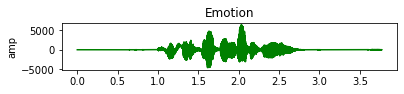

In [67]:
import wave
import numpy as np
import sys
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(4, 1, 1)
wav=wave.open("emotion6 (2).wav","r")
raw=wav.readframes(-1)
raw=np.frombuffer(raw,"int16")
sampleRate=wav.getframerate()
time=np.linspace(0,len(raw)/sampleRate,num=len(raw))
plt.title(f"Emotion")
plt.plot(time,raw,color=l[i])
plt.ylabel("amp")
plt.show()
    

[Text(0.5, 1.0, 'Emotion: Angry')]

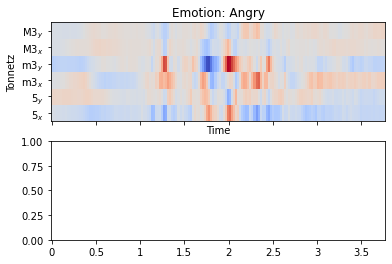

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


y, sr = librosa.load("emotion1.wav")
y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Emotion: Angry')

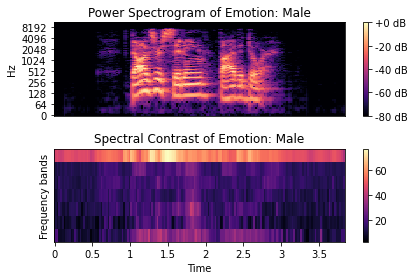

In [49]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
y, sr = librosa.load("emotion2.wav")
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power Spectrogram of Emotion: Male')
plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral Contrast of Emotion: Male')
plt.tight_layout()

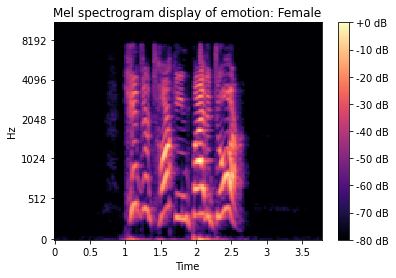

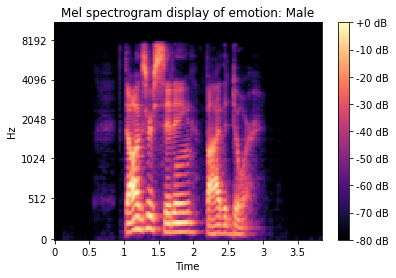

In [52]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
e=["emotion1.wav","emotion2.wav"]
emo=["Female", "Male"]
for i in range(0,2):
    y, sr = librosa.load(e[i])
    librosa.feature.melspectrogram(y=y, sr=sr)
    fig, ax = plt.subplots()
    M = librosa.feature.melspectrogram(y=y, sr=sr)
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
    ax.set(title=f'Mel spectrogram display of emotion: {emo[i]}')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    plt.savefig(f'mel plot {i+10}.png')


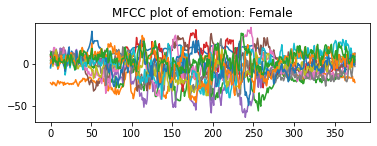

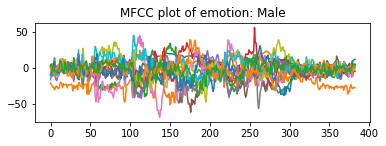

In [54]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
e=["emotion1.wav","emotion2.wav"]
emo=["Female", "Male"]
for i in range(0,2):
    (rate,sig) = wav.read(e[i])
    mfcc_feat = mfcc(sig,rate)
    plt.subplot(2,1,i+1)
    plt.plot(mfcc_feat)
    plt.title(f"MFCC plot of emotion: {emo[i]}")
    plt.show()